# Graph Lab

## Header information:

  - Author #1: Wenyu Yin (yinw7@mcmaster.ca)
  - Author #2: Xiang Zhang (zhanx326@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/zhanx326/l1-graph-lab.git
  - Avenue to Learn group name: Group 30

## <b>!!!</b> Run the cell below before running other cells

In [1]:
import sys
path = sys.path[0]
sys.path.append(path + "\\subway\\structures")
sys.path.append(path + "\\subway\\shortestPath")
sys.path.append(path + "\\subway\\utils")
sys.path.append(path + "\\subway\\patrolPlanning")
sys.path.append(path + "\\subway\\island")

# Week 1

## Load Information from csv Files

In [2]:
# Load graph data in csv
from dataLoader import DataLoader

data_loader_patrol = DataLoader('_dataset/london.stations - Test.csv', '_dataset/london.lines - Test.csv', '_dataset/london.connections - Test.csv')
data_loader_original = DataLoader('_dataset/london.stations.csv', '_dataset/london.lines.csv', '_dataset/london.connections.csv')
data_loader_island = DataLoader('_dataset/london.stations - Island.csv', '_dataset/london.lines - Island.csv', '_dataset/london.connections - Island.csv')


stations = data_loader_original.loadStation()
lines = data_loader_original.loadLine()
connections = data_loader_original.loadConnections(stations, lines)

stations_patrol = data_loader_patrol.loadStation()
lines_patrol = data_loader_patrol.loadLine()
connections_patrol = data_loader_patrol.loadConnections(stations_patrol, lines_patrol)

### Decisions and Justifications   
  
We use a DataLoader object to load .csv file data, generate Station, Line, Connection objects, and store them in separate unordered lists. Some specific decisions made in this process are:  
  
1. Store stations and lines in every Connection object rather than their ids.  
    - Create a stable reference between connections and stations/lines involved in them. Since ids are plain numbers, stations and lines IDs can easily be mixed up with the list index.  
  <br>
2. Use a list to store all stations, lines, and connections.   
    - We attempted to sort the stations by their IDs before adding them to a list and using their IDs as indices to refer to later. Still, considering that station ids may not be consecutive (e.g., no station 189 in the given .csv file), we decided to put them in an unordered list to save time generating the lists.  
  <br>
3. Use seperate classes to represent various structures  
    - For the purpose of single responsibility, we defined several classes to represent various subway structures like Station, Line, and Connections. In this way, not only can we "use" Station and Line objects in the Connection class to specifically refer to the corresponding structure, but also, there is no interference between different structures (i.e., stations, lines, and Connections are independent of each other).  

## Compute and Plot Graph Metrics

In [3]:
# Compute the metrics
from metricsHandler import MetricsHandler

metrics_handler = MetricsHandler(stations, lines, connections)

print(f"Number of nodes: {metrics_handler.computeNodeNum()}")
print(f"Number of edges: {metrics_handler.computeEdgeNum()}")
print(f"Average degree of the nodes: {metrics_handler.computeAvgDeg():.2f}")

Number of nodes: 302
Number of edges: 406
Average degree of the nodes: 2.69


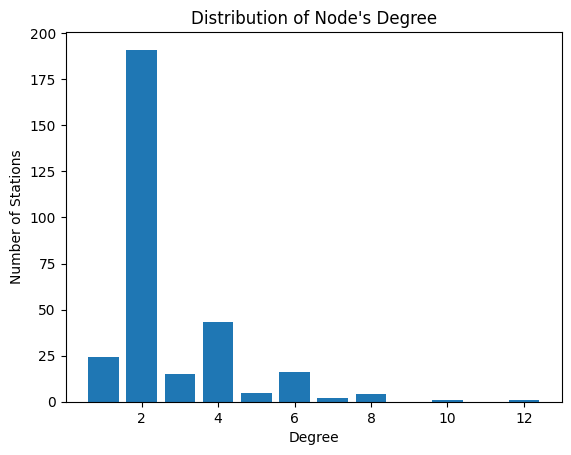

In [4]:
# Plot the distribution of node's degree
metrics_handler.plot()

## Calculate Heuristic Factor

In [5]:
# from math import sqrt, pow

# heuristic_fct = 0
# heuristic_fcts = []

# for c in connections:
#     x1 = c.s1.lat
#     y1 = c.s1.lon
#     x2 = c.s2.lat
#     y2 = c.s2.lon
#     heuristic_fcts.append(c.time / sqrt(pow(x1 - x2, 2) + pow(y1 - y2, 2)))

# print(sum(heuristic_fcts) / len(heuristic_fcts))

## Run and Evaluate Dijkstra and A\* Algorithms

In [6]:
from adjList import AdjList
from dijkstra import Dijkstra
from aStar import Astar
from pathGenerator import PathGenerator

adjList = AdjList(connections)
# Multiple test cases

# start = stations[9]
# end = stations[246]
start = stations[171]
end = stations[219]

# Use the following to find path between two stations with specific IDs
# start = next((station for station in stations if station.id == 141), None)
# end = next((station for station in stations if station.id == 77), None)


'''
    Running Dijkstra algorithm to find the shortest path
'''
dijkstra_algo = Dijkstra(adjList, stations, connections, start, end)
path_gen = PathGenerator()
edgeTo, expanding_count = dijkstra_algo.findShortestPath()
paths = path_gen.generatePath(edgeTo, start, end, connections)
print("=================== All path generated by DIJKSTRA ALGORITHM ===================")
for i, path in enumerate(paths):
    print(f"↓ Route No.{i+1} ↓")
    path.printItinerary()
    
print('=================== Top route decided ===================')
path_gen.pickTopInitinerary().printItinerary()

print(f'Ratio used/explored for Dijkstra: {path_gen.countStations()/expanding_count}')

'''
    Running A* algorithm to find the shortest path
'''

astar_algo = Astar(adjList, stations, connections, start, end)
path_gen = PathGenerator()
edgeTo, expanding_count = astar_algo.findShortestPath()

paths = path_gen.generatePath(edgeTo, start, end, connections)
print("\n=================== THE BEST Path generated by A* ALGORITHM ===================")
paths[0].printItinerary()

print(f'Ratio used/explored for A*: {path_gen.countStations()/expanding_count}')

=================== All path generated by DIJKSTRA ALGORITHM ===================
↓ Route No.1 ↓
197  - via line10 - 151 - via line9 - 259 - via line2 - 126 - via line2 - 48 - via line2 - 250
Transfer times: 2  -  Travel time: 8

↓ Route No.2 ↓
197  - via line10 - 151 - via line10 - 60 - via line10 - 126 - via line2 - 48 - via line2 - 250
Transfer times: 1  -  Travel time: 7

=================== Top route decided ===================
197  - via line10 - 151 - via line10 - 60 - via line10 - 126 - via line2 - 48 - via line2 - 250
Transfer times: 1  -  Travel time: 7

Ratio used/explored for Dijkstra: 0.006993006993006993

=================== THE BEST Path generated by A* ALGORITHM ===================
197  - via line10 - 151 - via line10 - 60 - via line10 - 126 - via line2 - 48 - via line2 - 250
Transfer times: 1  -  Travel time: 7

Ratio used/explored for A*: 0.2


### Decisions and Justifications  
  
To find the shortest path from the start to the end station, we implement two algorithms Dijkstra and A\*. Some specific decisions made in this process are:  

1. Use dictionary to represent the adjacency list   
    - An adjacency list is utilized to compare the weight of each connection and obtain the connection's data during the algorithms. We chose to define this adjacency list using a 2-dimensional dictionary and each station object as the key, which is beneficial for <b>quickly collecting connection path weight</b> and other crucial data. The value of the dictionary contains a list of connection travel times and their accompanying lines. By only defining the two stations as the "index" for calculating distances and transferring connection information in algorithms, this design decision enables us to get the path data more quickly and conveniently.  
    <br>
2. Make A\* and Dijkstra implement the abstract class (shortestPathAlgo)  
    - Due to the similarities between the A\* and Dijkstra algorithms (e.g., the use of the priority queue and the requirement of a start and finish station), we used an abstract class to define the classes that represent the two distinct algorithms, which <b>reduced their complexity and redundancy</b>. This choice also facilitates the addition of additional algorithms to the system, effectively increasing the extensibility of our software.  
    <br>
3. Use class instances rather than station.id/line.id to index dictionaries for edgeTo and distTo  
    - To store the station and associated data, we utilize two dictionaries, edgeTo and distTo (along with additional totalCost in A\*). We decided to use concrete Station and Line objects to index relevant dictionaries. Using objects as indices <b>creates a very solid reference to dictionaries</b> despite the fact that using their ids may be an option (but integer ids may get confused with list indices and reduce the readability of our program).   
    <br>
4. Use of Prioritized Item  
    - Priority Queues assist us in ordering the visited path according to the value in distTo so that we can cover more of the entire graph with the shortest-cost path in each iteration of the Dijkstra algorithm. This allows us to always locate the shortest path in the present. We use a Prioritized Item class to address the issue of running into stations with the same distTo value when pushing stations to the priority queue.  
    - PriorityItem has the folllowing attributes and offers us a straightforward way of storing and accessing
        - The distances from one station to the start point
        - The station itself  
    <br>
5. Select between less travel time and less transfer time for Dijkstra  
    - The "weight" of connections is the main factor in the original Dijkstra algorithm. We defined the values in edgeTo as a list that contains a set of the "closest" connections to the station and uses DFS to identify all paths from start to finish within those connections, taking into account that customers could prefer a slightly longer trip with fewer transfers between lines. In order to select the best course of action from all possible options, we added up the travel time and transfer time for each path, then chose the one with the lowest amount out of all practicable options. Additionally, since longer transfer times frequently accompany longer travel times, it is appropriate to just add them both together without producing considerable bias.   
    <br>
6. Use the physical distance as the heuristic for the A\* algorithm  
    - For the Dijkstra algorithm, we compute all pathways with comparable transfer time and travel time, and then, by comparing the total score for transfer time and travel time, we select the path with the best score. On the other hand, for the A\* algorithm, we decided to use the physical distances as the supporting argument as opposed to transfer time, considering that A\* is more efficient when it heads straight to the destination. Hence, taking transfer time into account is <b>unnecessary</b>. The A\* algorithm wastes less time exploring stations that will not be used in the final path as well.  
    <br>
7. Use 192.127 as a factor in the heuristic function for A\* algorithm  
    - A heuristic function that normally determines the distance between the current station and the final station is necessary for the implementation of A\*. This is done by applying Pythagoras' Theorem to determine the exact distance between two stations. The stations on our priority queue, however, are ordered according to their travel times. In order for the heuristic function to be useful, a <b>conversion</b> must be made. More details of how this number is obtains can be found above in Calculate Heuristic Factor section.  

## Week 1 Class Diagram
<!-- ![UML Diagram](C:\Study\University\Third_Year_Fall_Term\SFWRENG 3XB3\l1-graph-lab\images\Lab-1_UML_Week1.png) -->
![UML Diagram](.\images\Lab-1_UML_Week1.png)

## KPIs to measure  
We want something that can be quantified to measure the performance of Dijkstra and A\* algorithms  
1. Execution time  
2. Number of unused stations explored  
3. Growth of execution time with respect to growth of distance from start station to end station (somewhat similar to number of stations)   
4. Ratio of acceptable result and total number of results generated  

## Result and Analysis of Benchmark  
### Execution time and its relationship with distance between two stations  
<!-- ![distance vs. execution time](C:\Study\University\Third_Year_Fall_Term\SFWRENG 3XB3\l1-graph-lab\images\dist-exec.png)   -->
![distance vs. execution time](.\images\dist-exec.png)
  
- The average execution times of the two algorithms (running 200 times each) are roughly <i>0.001858 ms</i> and <i>0.003129 ms</i>, indicating that Dijkstra has a slower running time. To determine the shortest path, two techniques employ similar structures to compute and compare the travel costs of each connection. However, Dijkstra makes many visits to the same node to gather all the pertinent connections that account for transfer times, which increases the execution time. The heuristic function, on the other hand, calculates the surplus distance in A\*, assisting the algorithm in locating the optimum path without stopping at pointless nodes. As a result, A\* runs considerably quicker than Dijkstra.  
  <br>
- The graph illustrates how the general execution times of both algorithms <i>gradually grow as the distance increases</i>, taking into account the execution time variation dependent on the linear distance between the start and finish stations. Distance rising increases the number of nodes visited because the path can encompass more possibilities and connections. However, while being roughly twice as fast as A\*, Dijkstra is still noticeably slower. <i>The execution times of the two algorithms diverge as the distance widens</i>.  
  <br>
  
### Ratio of stations used in "best" paths to all stations explored by the algorithm
<!-- ![distance vs. used ratio](C:\Study\University\Third_Year_Fall_Term\SFWRENG 3XB3\l1-graph-lab\images\dist-ratio.png)    -->
![distance vs. used ratio](.\images\dist-ratio.png)
  
- The A\* algorithm, unlike Dijkstra, uses the heuristic function to help it go relatively quickly and directly in the direction of its goal. As a result, the <i>A\* algorithm saves time by spending less time examining edges that are too far from the present path than Dijkstra does</i>. Additionally, while Dijkstra requires generating all "best" paths so that we can compare the transfer times of paths, which prevents it from terminating immediately at destination and results in a reduction in explored stations used ratio, the A\* algorithm uses the physical distances between stations as a supporting argument for the "shortest" route between two stations.   
  <br>
- The outcome of this benchmark also explains why Dijkstra take longer to execute: Dijkstra spends more time doing searches on unused stations, but A\* makes better use of its resources.   

## Work Split
The group's workload is evenly split, and we typically complete the coding tasks together. Below is a list indicates how classes implemented individually. One person checks and polishes each area individually, and all programmes' integrity is guaranteed collectively.  

#### Wenyu Yin  
1. dijkstra
2. line, connection
3. metricsHandler
  
#### Xiang Zhang  
1. astar
2. station, itinerary
3. dataLoader  

# Week 2

## Patrol Planning

We created a graph specifically for the purpose of this session. Detailed data can be found in _dataset folder, and a visualization of the graph is shown below.  
<!-- ![Islands Testing Image](C:\Study\University\Third_Year_Fall_Term\SFWRENG 3XB3\l1-graph-lab\images\tsp_test_graph.jpg) -->
![Islands Testing Image](.\images\tsp_test_graph.jpg)

In [7]:
from TSPAlgo import TSP
from adjList import AdjList
import time

adjList_patrol = AdjList(connections_patrol)
tsp = TSP(adjList_patrol, stations_patrol[1], [stations_patrol[3], stations_patrol[2], stations_patrol[6], stations_patrol[0], stations_patrol[1],
                                    stations_patrol[4], stations_patrol[5], stations_patrol[7], stations_patrol[8]])

begin = time.time()
tsp.travellingSalesmanProblem()
print(f'Running the brute-fore algorithms takes {time.time() - begin}')

print(f'Shortest Distance Travelled: {tsp.min_path}')
tsp.printShortestPath()

Running the brute-fore algorithms takes 0.04503226280212402
Shortest Distance Travelled: 15
2 -> 5 -> 6 -> 4 -> 3 -> 7 -> 1 -> 8 -> 9 -> 2


### Decisions and Justifications  

1. Use brute-force algorithm rather than dynamic programming
    - Brute-force is more <b>intuitive</b>. Although it is less efficient than dynamic programming, it is more reliable as it considers all the possibilities. In terms of the drawback in the runtime of this algorithm, refer to the TSP section in Analysis of Algorithm Performances.  
  <br>
2. Do not take the line number into account when generating the route
    - We assume that all direct connections between two stations are the same regardless of the line number, so taking different lines in this route does not make a difference.

## Find Islands and Their Connections

We created a graph specifically for the purpose of this session. Detailed data can be found in \_dataset folder, and a visualization of the graph is shown below.  
<!-- ![Islands Testing Image](C:\Study\University\Third_Year_Fall_Term\SFWRENG 3XB3\l1-graph-lab\images\island_test_graph.jpg) -->
![Islands Testing Image](.\images\island_test_graph.jpg)

In [8]:
from island import Island
import time

# ================================ Test 1 ================================

island = Island(stations, connections, adjList)
begin = time.time()
island.separateIslandInZone()
print(f'Finding all islands takes {time.time() - begin}')
island.printIsland()
print()

begin = time.time()
island.findIslandInZone(stations[0], stations[6])
print(f'Finding connections between islands takes {time.time() - begin}')

# ================================ Test 2 ================================

print('\n', '\n')

stations = data_loader_island.loadStation()
lines = data_loader_island.loadLine()
connections = data_loader_island.loadConnections(stations, lines)

adjList = AdjList(connections)

island = Island(stations, connections, adjList)
begin = time.time()
island.separateIslandInZone()
print(f'Finding all islands takes {time.time() - begin}')
island.printIsland()
print()

begin = time.time()
island.findIslandInZone(stations[1], stations[3])
print(f'Finding connections between islands takes {time.time() - begin}')

Finding all islands takes 0.001001119613647461

In zone3, the islands are the following: 
--------------------------
Island1 contains station(s): 1, 52, 265, 108, 141, 73, 72, 286, 181, 112, 182, 194, 234, 176
--------------------------
Island2 contains station(s): 8, 124, 77
--------------------------
Island3 contains station(s): 12, 56, 257, 258, 59, 240
--------------------------
Island4 contains station(s): 19, 97, 65, 20, 217, 203, 63, 219, 43, 79, 183, 289, 36, 200, 270, 78, 247, 153, 154, 204
--------------------------
Island5 contains station(s): 26, 260, 224, 274
--------------------------
Island6 contains station(s): 31, 303, 266, 160
--------------------------
Island7 contains station(s): 34, 100, 111, 119
--------------------------
Island8 contains station(s): 71, 172, 297
--------------------------
Island9 contains station(s): 80, 231, 300, 299
--------------------------
Island10 contains station(s): 113, 246, 298
--------------------------
Island11 contains station(s): 64

### Decisions and Justifications  

1. Use dictionaries to represent the graph  
    - Since it is <b>simple to access the data</b> using an index, we utilize dictionaries to store the zone_graph and island_graph. For zone_graph, we specify the zone number as the key and a list of the stations that are in this zone as the associated value. The zone number serves as the key and the list of islands in that zone serves as the value for island graph (each island is a sublist with stations). The implementation is easier to understand when using dictionaries rather than lists because the zone number starts at 1, whereas the index of a list begins at 0.   
   <br>
2. Use A\* instead of Dijkstra to find the shortest path  
    - When a user inputs two stations, the algorithm prints out if they are in the same zone and on separate islands and then determines the shortest path between the islands of these two stations and the zone they traversed. Each station in station 1's island will serve as the start point for the A\* algorithm, while each station in station 2's island will serve as the end point. Depsite the fact that Dijkstra has a feature that takes into consideration transfer time, A\* is more appropriate than Dijkstra since we just need to identify the shortest path based on the journey time and physical distance. Furthermore, <b>execution time of A\* is demonstrably quicker</b> than Dijkstra's in the interim.  
     <br>
3. Accept two stations as the input  
    - We could index the islands and allow the user to input them directly rather than accepting two stations as the input and identifying the islands to which they belong. This strategy, however, has a number of shortcomings. First of all, since the two islands share nothing common, indexing an island can be challenging. It is also possible that the order in which the islands are kept could be disrupted. In the opposite, <b>inputting stations provide a consistent reference to the islands</b>. Additionally, requesting inputs from an island is not very user-friendly because users need a complete list of stations. On the other hand, <b>users may easily give two stations</b>, and we can quickly get the islands they are in.  
    <br>
4. Give the output using print instead of return  
    - We can customize our print function to satisfy our requirements while returning the path requires additional data processing. It is also more intuitive to print out the full path.

## Week 2 UML
<!-- ![Week 2 UML](C:\Study\University\Third_Year_Fall_Term\SFWRENG 3XB3\l1-graph-lab\images\Lab-1_UML_Week2.png)   -->
![Week 2 UML](.\images\Lab-1_UML_Week2.png)
- Parts that are in blue are additional or modified feature in week 2. 

## Changes and SOLID Principles  

### single responsibility  
- There are separate jobs for each class in our library. We separate the route-generating functionality from the path-finding algorithms and construct a new class called "path generator" to obtain and print the path we discovered using various algorithms. The design becomes more manageable and reduces duplication caused by writing the same code twice for the two algorithms.  

### open-closed principle  
- We use the strategy pattern that each algorithm is extended from an abstract shortestPathAlgo class while building the two shortest path algorithms. This makes it simple to tweak and update the design with new algorithms. It encapsulates the different strategies and can quickly switch between these algorithms depending on certain circumstances.  
    
### dependency inversion  
- Our shortestPathAlgo abstract class, notably the new function runAlgorithm() function where we run A\* or Dijkstra algorithm without stating which one we are using, greatly improves the dependency inversion principle. As a result, the dependency chain is reversed and the shortest path finding algorithm will be applied to any object that does runAlgorithm() rather than how the method is implemented.

## Analysis of Algorithm Performances  

### TSP  
- The algorithm's time complexity is O(N!×N) since it generates every permutation of the given stations, checks if the permutation forms a Hamilton cycle, and updates the shortest_dist and shortest_path if a better path is found. In the worst case, there is a connection between every two stations, then checking each permutation takes N times as it checks all stations. As a result, N!×N checks will be performed to examine the permutations.  
  
- Clearly, an algorithm with a complexity of <i>O(N!×N)</i> is not quite efficient, but due to the situation we are given that the patrol officer is travelling among a series of stations to ensure security and offer assistance, it is reasonable to assume that the officer will visit less than ten stations, which only leads to a slight delay in our program. Furthermore, this brute-force algorithm will not always run at O(N!×N) as the lack of connections between many stations. It will always provide us with the most efficient route reliably too as it considers every possibility.  

- In fact, running this brute-force algorithm on a set of 9 stations only takes <i>0.05 s</i>, which we considered acceptable according to the number of stations we assumed above (i.e., <= 10 stations).  

### Find Islands  
- The complexity of the algorithm is <i>O(V)</i>, and V is the length of the station's list (number of nodes in the graph) since we use the dictionaries to represent the graph that visiting one node takes O(1) and it runs DFS on each node (station) of the zone_graph. There is no worst case scenario because every single node will be visited in the for loop or in the DFS recursion exactly once in order to find all connected islands, while the visited node will be skipped. Therefore, there is no additional complexity and the time complexity of island finding is linear (i.e., O(V)).  
  
- To find the island of provided London Subway Stations graph, the runtime of this algorithm only takes <i>0.002995 s</i> for 300+ stations, which can be considered an efficient result.  
  

### Find Connection Between Islands  
- We must first determine which islands the two stations are on in order to establish links between them. In order to do this, we access the island graph dictionary using station.zone as an index and run a search across all islands in that zone. Then, to identify the shortest route between any two stations on the two islands, we traverse through each pair of stations using a nested for loop. The time complexity of finding islands will be O(N) if both stations are part of islands that have N stations. Since two stations in the same zone should be close to one another based on physical distance, the A\* heuristic should generate an output in this situation very quickly. Nevertheless, we must execute A\* N times. Therefore, the time complexity is at least O(N×N). The final algorithm will be <b>AT LEAST</b> <i>O(N×N)</i> given O(N) in finding islands and O(N×N) in A\*'s.  
  
- Due to the close distance between the two stations, A\* should offer us an answer in a relatively short amount of time. As a matter of fact, running the algorithm takes <i>0.092 s</i> for two islands with the size of 14 and 8, which we considered acceptable since our program will be utilized in a subway system rather than in a scientific circumstance.  
  

# Week 3

## Test for Random Graph Generator

In [9]:
from randomGen import RandomGenerator
from randomNormal import RandomNormal
from adjList import AdjList
from dijkstra import Dijkstra
from aStar import Astar
from pathGenerator import PathGenerator

# rg = RandomGenerator(400, 3)
rg = RandomNormal(400, 4)

connections = rg.c_list
stations = rg.s_list
lines = rg.l_list

adjList = AdjList(connections)
start = stations[9]
end = stations[86]


'''
    Running Dijkstra algorithm to find the shortest path
'''
dijkstra_algo = Dijkstra(adjList, stations, connections, start, end)
path_gen = PathGenerator()
edgeTo, expanding_count = dijkstra_algo.findShortestPath()

paths = path_gen.generatePath(edgeTo, start, end, connections)
print("=================== All path generated by DIJKSTRA ALGORITHM ===================")
for i, path in enumerate(paths):
    print(f"↓ Route No.{i+1} ↓")
    path.printItinerary()
    
print('=================== Top route decided ===================')
path_gen.pickTopInitinerary().printItinerary()


'''
    Running A* algorithm to find the shortest path
'''

astar_algo = Astar(adjList, stations, connections, start, end)
path_gen = PathGenerator()
edgeTo, expanding_count = astar_algo.findShortestPath()

paths = path_gen.generatePath(edgeTo, start, end, connections)
print("\n=================== THE BEST Path generated by A* ALGORITHM ===================")
paths[0].printItinerary()

=================== All path generated by DIJKSTRA ALGORITHM ===================
↓ Route No.1 ↓
9  - via line5 - 197 - via line4 - 186 - via line8 - 273 - via line7 - 156 - via line9 - 107 - via line1 - 86
Transfer times: 5  -  Travel time: 13

↓ Route No.2 ↓
9  - via line5 - 111 - via line6 - 26 - via line11 - 157 - via line13 - 273 - via line7 - 156 - via line9 - 107 - via line1 - 86
Transfer times: 6  -  Travel time: 12

↓ Route No.3 ↓
9  - via line5 - 111 - via line12 - 66 - via line4 - 258 - via line10 - 170 - via line3 - 330 - via line11 - 86
Transfer times: 5  -  Travel time: 11

=================== Top route decided ===================
9  - via line5 - 111 - via line12 - 66 - via line4 - 258 - via line10 - 170 - via line3 - 330 - via line11 - 86
Transfer times: 5  -  Travel time: 11


=================== THE BEST Path generated by A* ALGORITHM ===================
9  - via line5 - 111 - via line6 - 26 - via line12 - 143 - via line4 - 182 - via line8 - 169 - via line6 - 257 - via

## Normally Distributed Connections

Average degree of the nodes: 4.02


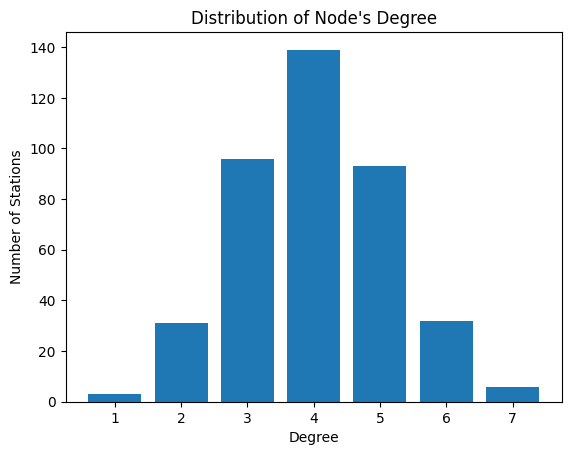

In [10]:
from metricsHandler import MetricsHandler

metrics_handler = MetricsHandler(stations, lines, connections)

print(f"Average degree of the nodes: {metrics_handler.computeAvgDeg():.2f}")

metrics_handler.plot()

# Self Reflection
### Have you done a similar kind of work in the past?  
- WY: No, I haven't done any graph implementation and coded the related algorithms, especially for Astar and the traveling salesman problem algorithm that I haven't heard of. However, I've learned graph data structure, Dijkstra, and connected components by understanding the concepts behind the algorithm.  
- XZ: Not really. Even though I had experience with Python programming and object-oriented programming, I had never designed and implemented such a graph system. Several algorithms like A\* and TSP solution are also new to me. I wasn't very familiar with benchmarking and measuing KPIs before as well.  
     
### How do you feel about this piece of work? What parts do you particularly like? Dislike? Why?  
- WY: As engineering students, this work really helps us get more coding and design experience since it challenges us to put what we've learned into practice. But there are too many tasks that need to be completed in a single week. It takes a lot of times to complete each stage because this is the first time we try to complete this kind of task.  
- XZ: This project taught me a lot in terms of polishing my code and making decisions based on the resources provided and client requirements. I was highly engaged while accomplishing weekly goals and summarizing our work in the report. It would be a nicer experience if we are given more time to refine our work and make wiser decisions.   
       
### Outward What is the one thing you particularly want people to notice about your work?  
- WY: The data structures and ways of implementing algorithms we used are intuitive and easy to understand. Our way of structuring classes and functions also enhanced SOLID principles. It was also noteworthy that we documented almost all decisions we made, including why we choose certain data structures, how we implemented some of the algorithms, etc.  
- XZ: We created some data structures like PrioritizedItem to satisfy our requirements, and these data structures can also be helpful in other applications. We also created private methods in some classes to reduce the amount of duplicate code in those classes, which shortens our functions and improve the readability of our code depite of slightly increase in the project's complexity.  
       
### Forward What would you change if you had the chance to do this project over again?  
- WY: The next time, I may try to design the data structures and algorithm fully before I actually implement it. Since we are unfamiliar with this kind of project, we try to code it and output what it looks like whenever we have some ideas. And there have many alterations in the process.  
- XZ: I will devote more time in the preparation stage of the project, including making flow charts, figuring out client requirements, and constructing the UML diagram. Another improvement will be to push the local repository more often to keep the design process documented.  
